<a href="https://colab.research.google.com/github/AureliaWambui19/Titanic-KNN/blob/main/aurelia_wambui_week_9_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Introduction

- RMS Titanic was a British passenger liner that sank in the North Atlantic Ocean in the early hours of 15 April 1912, after colliding with an iceberg during her maiden voyage from Southampton to New York City. 
- There were an estimated 2,224 passengers and crew aboard, and more than 1,500 died, making it one of the deadliest commercial peacetime maritime disasters in modern history.
- RMS Titanic was the largest ship afloat at the time she entered service and was the second of three Olympic-class ocean liners operated by the White Star Line.
-The Titanic was built by the Harland and Wolff shipyard in Belfast. Thomas Andrews, her architect, died in the disaster

## 1.1Defining the Questions

1. Predict if a passenger survived the sinking of the Titanic or not.




## 1.2 Metrics for success
* Accuracy and FI score will be used todeterrmine efficiency,the highest the score ,the better the model
*different split sizes 80-20,70-30 and 60-40  will be used to determine the best of the three

 

## 1.3Appropriateness of the data
**Dataset 1 links:**
* Train set: [link text](https://www.kaggle.com/c/titanic/download/train.csv)
* Test set:[link text](https://www.kaggle.com/c/titanic/download/test.csv)

The dataset contains the following fields:
* Pclass Ticket class (: 1=upper, 2=middle, 3=lower)
* Sex : Gender
* Age : Age in years (fractional for babies)
* Sibsp : Number of siblings and spouse. Sibling = brother, sister, stepbrother, stepsister.    Spouse = husband, wife (mistresses and fiancés were ignored)
* Parch: Number of parents or children aboard the ship. Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.
* Ticket: Ticket number (a string of characters)
* Fare: Passenger fare (dollars)
* Cabin: Cabin number (a string of characters)
* Embarked: Port of embarkation (S=Southampton, Q=Queenstown (now Cobh), C=Cherbourg)
* Survived 0 for no,1 for yes



# Data Understanding

## 2.1 Importing libraries

In [ ]:
# Importing Libraries we will use for this project analysis

import pandas as pd  # for data processing
import numpy as np  # for numerical calculations

import seaborn as sns
import seaborn as sb

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
%matplotlib inline

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold, cross_val_predict
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, normalize, Normalizer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from sklearn.impute import KNNImputer


from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier


## 1.2 Loading the datasets

In [ ]:
# Loading the FIRST dataset (TRAIN)

Train= pd.read_csv('Train.csv')



In [ ]:
# Loading the FIRST dataset (TEST)

Test =pd.read_csv('Test.csv')

## 2.3 Checking data

In [ ]:
# Viewing the first  five observations of the train dataset
Train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# Viewing the first five observations of the test dataset
Test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Checking the number of rows and columns in the dataset

# Get the number of rows and columns 
rows = len(Train.axes[0]) 
cols = len(Train.axes[1]) 
  
# Print the number of rows and columns 
print("Number of Rows in this Train dataset is: " + str(rows)) 
print("Number of Columns in this Train dataset is : " + str(cols)) 


Number of Rows in this Train dataset is: 891
Number of Columns in this Train dataset is : 12


In [ ]:
# Get the number of rows and columns 
rows = len(Test.axes[0]) 
cols = len(Test.axes[1]) 
  
# Print the number of rows and columns 
print("Number of Rows in this test dataset is: " + str(rows)) 
print("Number of Columns in this test dataset is : " + str(cols)) 


Number of Rows in this test dataset is: 418
Number of Columns in this test dataset is : 11


#3 Data Preparation

In [ ]:
# We will the last five observations of the train sets

Train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


From the table above: 


some e features have widely different ranges, that we will need to convert into roughly the same scale. 

We can also spot some more features, that contain missing values (NaN = not a number)


In [ ]:
# viewing summary information for our train set

Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Cabin  and age column has a lot of missing data (891 is the number of entries in other columns such as passegerID,Survived yet cabin has only 204 while age has 714)

In [ ]:
# Checking the unique values in each column
# Using a for loop to iterate through the dataframe, 
# finding the unique values in each column then print them out 
#
#

for column in Train.columns:                              # Iterating through each column in the dataframe
  print(column)                                        # Printing the column name
  print(Train[column].unique())                           # Printing out the unique values in each column
  print(Train[column].nunique())                          # Printing out the number of unique values in each column
  print('') # this separates the results of the output by creating spacing between the various output 

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

It is observed that some column eg age,cabin.embarked have missing values

In [ ]:
# Summary statistics of the Train sets
# 
Train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200






 some features, that contain missing values, like the ‘Age’ feature.


In [ ]:
# checking the columns names

Train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

##3.1 Missing values

In [ ]:
# Checking for null values

Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

age has 177 missing values,cabin has 687 missing values and embarked column 2 

In [ ]:
# Dealing with the Missing Data
#

In [ ]:
# will start by dropping irrelevant columns that dont affect my target variable survibal
TrainData = Train.drop(['PassengerId','Name','Ticket','Cabin'], 1)
TrainData.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
# Checking for null values after dropping irrelevant columns

TrainData.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Age still has 177 columns and embarked 2

In [ ]:
TrainData.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

to deal with missing values one can use various ways eg dropping the missing records,inmputting mean,mode etc ..in this instance am going to use 
KNN imputer KNN Imputer does not recognize text data values so in this case sex and embarked columns have to encoded
KNN Imputer maintains the value and variability of your datasets and yet it is more precise and efficient than using the average values.

In [ ]:
encodeded = TrainData[['Sex','Embarked']]
encodeded = pd.get_dummies(encodeded, drop_first=True)
encodeded.head()

,Sex_male,Embarked_Q,Embarked_S
0,1,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,1,0,1


In [ ]:
TrainData.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [ ]:
# dropping  the original “Sex” and “Embarked” columns from the data frame and add the dummy variables.
df = TrainData.drop(['Sex', 'Embarked'], axis=1)
df.tail(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
889,1,1,26.0,0,0,30.00
890,0,3,32.0,0,0,7.75


In [ ]:
# concating dataset df and dummy variables
TrainFinal= pd.concat([df, encodeded], axis=1)
TrainFinal.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


eKNN Imptuer is a distance-based imputation method and it requires us to normalize our data. Otherwise, the different scales of our data will lead the KNN Imputer to generate biased replacements for the missing values. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
TrainFinal = pd.DataFrame(scaler.fit_transform(TrainFinal), columns = TrainFinal.columns)
TrainFinal.head()

Missing values will be replaced by the mean value of 5 nearest neighbors measured by Euclidean distance.

In [ ]:

imputer = KNNImputer(n_neighbors=5)
TrainFinal = pd.DataFrame(imputer.fit_transform(TrainFinal),columns = TrainFinal.columns)

In [ ]:
# Checking for null values after inputiing

TrainFinal.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

There are nolonger anymore missing values


## 3.2 Duplicates

In [ ]:
# checking for duplicates
TrainFinal.duplicated().sum()

112

There are 112  duplicates and we will drop them

In [ ]:
# Dropping for duplicates 

TrainFinal.drop_duplicates(inplace = True)

# Cconfriming that we no longer have duplicates

TrainFinal.duplicated().sum()

0

Duplicates have been successfully dropped

## 3.3Outliers

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

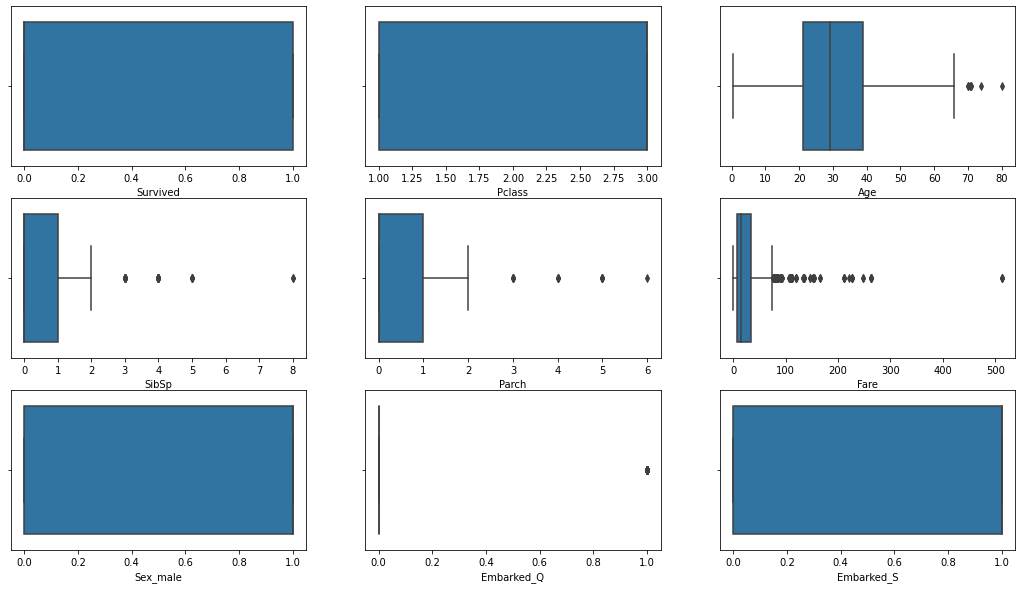

In [ ]:
# using boxplots to display outliers
fig, ((ax1, ax2,ax3), (ax4, ax5,ax6),(ax7, ax8,ax9))  = plt.subplots(3,3, figsize=(18, 10))

sns.boxplot(TrainFinal['Survived'], ax=ax1)
sns.boxplot(TrainFinal['Pclass'], ax=ax2)
sns.boxplot(TrainFinal['Age'], ax=ax3)
sns.boxplot(TrainFinal['SibSp'], ax=ax4)
sns.boxplot(TrainFinal['Parch'], ax=ax5)
sns.boxplot(TrainFinal['Fare'], ax=ax6)
sns.boxplot(TrainFinal['Sex_male'], ax=ax7)
sns.boxplot(TrainFinal['Embarked_Q'], ax=ax8)
sns.boxplot(TrainFinal['Embarked_S'], ax=ax9)

plt.show()

some columns such as survived,plcass,sexmale,embarked s didnt have any outliers
others such as sipsp,parch,fare,embarked q have outliers which will be maintained for now

#4 EDA

## 4.Univariate analysis

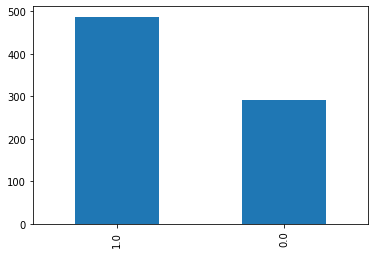

In [ ]:
TrainFinal['Sex_male'].value_counts().plot(kind='bar')

There were more  males than females

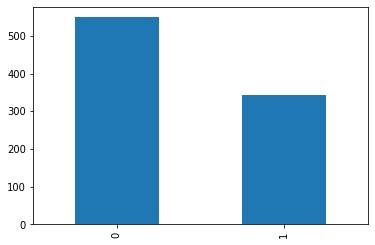

In [ ]:
Train['Survived'].value_counts().plot(kind='bar')

most people did not survive

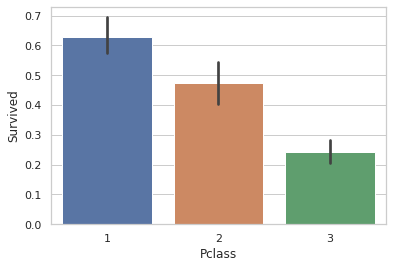

In [ ]:
# Using a bar chart from seaborn
sns.set(style = 'whitegrid', context = 'notebook')
sns.barplot(x='Pclass', y='Survived', data=Train)

* Most passengers occupied Ist class ,followed by second and lastly 3rd class.


In [ ]:
TrainFinal.std()

Survived       0.492751
Pclass         0.854573
Age           14.222901
SibSp          0.988534
Parch          0.838941
Fare          52.292701
Sex_male       0.484392
Embarked_Q     0.262678
Embarked_S     0.447301
dtype: float64

the standard deviations are quite low implying the datapoints are close to each other with exceptioof age and fare which is high as compared to the rest of the features

In [ ]:
TrainFinal.skew()

Survived      0.352602
Pclass       -0.492270
Age           0.345615
SibSp         3.047922
Parch         2.622099
Fare          4.557901
Sex_male     -0.518103
Embarked_Q    3.248399
Embarked_S   -1.004163
dtype: float64

  The rule of thumb seems to be:

If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
If the skewness is less than -1 or greater than 1, the data are highly skewed
from the above it can be observed that 


1.   Survived,pclass,age,sex_male columns have data that is fairly symmetrical
2.   Sibsp,parch,fare,ebarked q are highly skewed and more so right skewed
3.   embarked s is moderately  skewed as well as the left hand tail is longer than right tail


## 4.2 Bivariate analysis

In [ ]:
# Checking for independence between features¶
# 
# Correlation
# This is the association between numerical variables in the dataset
# Computing the correlation matrix 

TrainFinal.corr()

# for better interpretation we will a heatmap; a visual.

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
Survived,1.000000,-0.335613,-0.093516,-0.037102,0.069175,0.246415,-0.513211,-0.039467,-0.134884
Pclass,-0.335613,1.000000,-0.379686,0.086299,0.039567,-0.552356,0.116734,0.210596,0.106644
Age,-0.093516,-0.379686,1.000000,-0.277841,-0.198432,0.093760,0.129433,-0.022680,-0.014313
SibSp,-0.037102,0.086299,-0.277841,1.000000,0.381021,0.134379,-0.098489,-0.002237,0.060701
Parch,0.069175,0.039567,-0.198432,0.381021,1.000000,0.190872,-0.236596,-0.065746,0.061566
Fare,0.246415,-0.552356,0.093760,0.134379,0.190872,1.000000,-0.169029,-0.109481,-0.186457
Sex_male,-0.513211,0.116734,0.129433,-0.098489,-0.236596,-0.169029,1.000000,-0.043027,0.109211
Embarked_Q,-0.039467,0.210596,-0.022680,-0.002237,-0.065746,-0.109481,-0.043027,1.000000,-0.459374
Embarked_S,-0.134884,0.106644,-0.014313,0.060701,0.061566,-0.186457,0.109211,-0.459374,1.000000


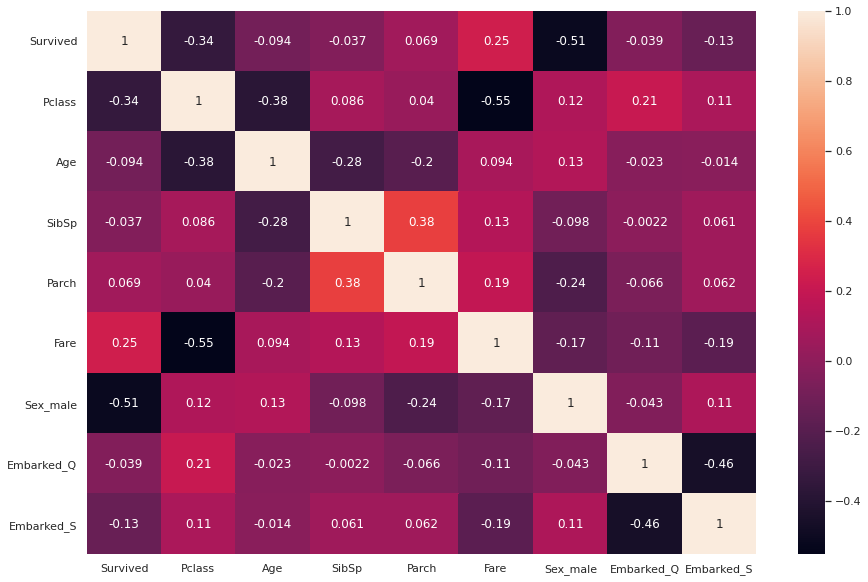

In [ ]:
# Ploting a heatmap
 

plt.subplots(figsize=(15,10))
sns.heatmap(TrainFinal.corr(),annot=True)

the highest correlation observed is that ofParch and Sibsp which is 0.38 which is a medim positive correlation
Most of other features have a weak or medium correlation both positive and correlation

#5 Building  Machine Learning Models

##.5.1K-Nearest Neighbours Classifier
* KNN
* It is a supervised Machine learning algorithm
* It's non-parametric as it use flexible number of parameters.
* It makes few assumptions about the data.
* Also, an instance based algorithm;
* i.e. knn looks at the nearest neighbours to decide what any queried point should be.
* It stores all the available cases and classifies new cases by a majority vote of its K neighbours. 

Advantages
* Knn is easy to use.
* Requires quick calculation time.
* It does not make assumptions about the data.

Disadvantages

* The accuracy of the algorithm depends on the quality of the data.
* One needs to find an optimal k value (number of nearest neighbors).
* It is poor at classifying data points in a boundary where they can be classified one way or another.



Splitting the train set into 80, 20 set

In [ ]:
# Splitting the data into features and target variable

X = TrainFinal.drop('Survived', axis = 1)
y = TrainFinal.Survived

# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)


knc= KNeighborsClassifier(n_neighbors=3)



# Fitting the KNN classifier to our train data set
model1= knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model1.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))



0.6282051282051282


[[59 23]
 [35 39]]


              precision    recall  f1-score   support

         0.0       0.63      0.72      0.67        82
         1.0       0.63      0.53      0.57        74

    accuracy                           0.63       156
   macro avg       0.63      0.62      0.62       156
weighted avg       0.63      0.63      0.62       156



* The 80,20 split model yielded 62.8243% accuracy.
* Interpreting the confusion matrix;

     * 59 passengers were correctly classified as not survived (called true negatives) 
     * 35 were wrongly classified as not survived (false positives).

     * 23 passengers where wrongly classified as survived (false negatives) and
     * 39 were correctly classified as survived (true positives).

Splitting the train set into 70, 30 sets 

In [ ]:
# Splitting the data into features and target variable

X = TrainFinal.drop('Survived', axis = 1)
y = TrainFinal.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 10)



# Instantiating our model

knc= KNeighborsClassifier(n_neighbors=3)


# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.6452991452991453


[[98 33]
 [50 53]]


              precision    recall  f1-score   support

         0.0       0.66      0.75      0.70       131
         1.0       0.62      0.51      0.56       103

    accuracy                           0.65       234
   macro avg       0.64      0.63      0.63       234
weighted avg       0.64      0.65      0.64       234



* The 70,30 split model yielded 64.52% accuracy.
* This is higher compared to the 80,20 model.
* Interpreting the confusion matrix.
* The first row is about the not-survived-predictions:
     * 98 passengers were correctly classified as not survived (called true negatives) 
     * 50 9were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 33 passengers where wrongly classified as survived (false negatives) and
     * 53 were correctly classified as survived (true positives).

Splitting the train set into 60, 40 sets .



In [ ]:
# Splitting the data into features and target variable

X = TrainFinal.drop('Survived', axis = 1)
y = TrainFinal.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 10)


# Instantiating our model
# Using default  k= 5
knc= KNeighborsClassifier(n_neighbors=3)


# Fitting the KNN classifier to our train data set
model3 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model3.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.6538461538461539


[[139  38]
 [ 70  65]]


              precision    recall  f1-score   support

         0.0       0.67      0.79      0.72       177
         1.0       0.63      0.48      0.55       135

    accuracy                           0.65       312
   macro avg       0.65      0.63      0.63       312
weighted avg       0.65      0.65      0.64       312



* The 60,40 split model yielded 65.38% accuracy.
* The 60,40 split model has the highest score of the three models
* Interpreting the confusion matrix.
* The first row is about the not-survived-predictions:
    *139 passengers were correctly classified as not survived (called true negatives) 
     * 38 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
      *38 passengers where wrongly classified as survived (false negatives) and
      * 65 were correctly classified as survived (true positives).

Applying scaling of features (not previously done) to test impact of scaling a model on its accuracy 

In [ ]:
# Splitting the data into features and target variable

X = TrainFinal.drop('Survived', axis = 1)
y = TrainFinal.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 10)
# scaling our 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Instantiating our model

knc= KNeighborsClassifier(n_neighbors=3)


# Fitting the KNN classifier to our train data set
model2 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model2.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))

0.7564102564102564


[[149  28]
 [ 48  87]]


              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80       177
         1.0       0.76      0.64      0.70       135

    accuracy                           0.76       312
   macro avg       0.76      0.74      0.75       312
weighted avg       0.76      0.76      0.75       312



Its observed that scaling jas imporoved the 60-40 model from 65.38%to 75.64%

##5.2 Hyperparameter Tuning

Parameters to tune in KNN

* k's
* Distance Metric
* Weights

In [ ]:


# Splitting the data into features and target variable

X = TrainFinal.drop('Survived', axis = 1)
y = TrainFinal.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 10)
# scaling our 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


# Instantiating our model

knc= KNeighborsClassifier(n_neighbors=3)



# Fitting the KNN classifier to our train data set
model4 = knc.fit(X_train, y_train)


# Searching the best parameters using Rnadom Search
params = { 'n_neighbors' : range(1,11),
          'metric' : ['euclidean', 'manhattan', 'minkowski'],
          'weights': ['uniform', 'distance']}
          
kfold = KFold(n_splits = 5)  # specifying number of folds for cross validation
        
rs = RandomizedSearchCV(KNeighborsClassifier(),
                       params,  cv = kfold,
                       n_jobs = -1)
          
rs = rs.fit(X_train, y_train)
rs.best_params_


{'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}

Using the Best parameters to assess the best split KNN model (60,40)

In [ ]:
# Splitting the data into features and target variable

X = TrainFinal.drop('Survived', axis = 1)
y = TrainFinal.Survived


# Splitting the data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.4, random_state = 10)


# scaling our 
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)



# Instantiating our model
# Using our best parameters using random search
knc = KNeighborsClassifier(metric = 'minkowski', n_neighbors= 8, weights = 'uniform')

# Fitting the KNN classifier to our train data set
model5 = knc.fit(X_train, y_train)


# Making prediction the created model
y_pred = model5.predict(X_test)


# Evaluating our model using accuracy score, confusion matrix and classification report.
print(accuracy_score(y_test, y_pred))

print('\n')

print(confusion_matrix(y_test, y_pred))

print('\n')

print(classification_report(y_test, y_pred))


0.7660256410256411


[[162  15]
 [ 58  77]]


              precision    recall  f1-score   support

         0.0       0.74      0.92      0.82       177
         1.0       0.84      0.57      0.68       135

    accuracy                           0.77       312
   macro avg       0.79      0.74      0.75       312
weighted avg       0.78      0.77      0.76       312



* There is an improvement in our tuned model.

* Interprating the confusion matrix:
* The first row is about the not-survived-predictions:
     * 162 passengers were correctly classified as not survived (called true negatives) 
     * 58 were wrongly classified as not survived (false positives).
* The second row is about the survived-predictions: 
     * 15 passengers where wrongly classified as survived (false negatives) and
     * 77 were correctly classified as survived (true positives).
     
* The F1 score improved 
* Our model predicts 84% of the time, a passengers survival correctly (precision).


#6Conclusion
.
* From the analysis: Tuning ,scaling and Optimizing the KNN model is highly recommended to improve the performance of the model.**
* Splitting the data into 60-40 train and test sets was the best in the Titanic dataset.